# California Housing Price Prediction

## Project Overview

In this project, we aim to predict median house values in California districts using the California Housing dataset provided by Scikit-Learn.

The goal is not only to build a predictive model, but also to understand:

- How the raw data behaves
- How different features relate to house prices
- Whether feature engineering improves model performance
- How linear and non-linear models compare on this dataset

This project is structured as a small end-to-end machine learning case study, including:

1. Dataset overview
2. Baseline model evaluation on raw data
3. Exploratory Data Analysis (EDA)
4. Feature engineering (if needed)
5. Model comparison and final evaluation

By comparing a Linear Regression model with a Random Forest model, we aim to investigate whether the relationships in the data are primarily linear or non-linear.

The focus of this project is not just achieving the lowest error, but understanding **why** certain modeling choices perform better than others.

---

## Problem Statement

Given numerical features describing housing districts (income, age, room count, population, etc.), we aim to predict:

**Median House Value** (target variable)

This is a supervised regression problem where:

- Inputs: 8 numerical features
- Output: Continuous target variable (MedianHouseValue)

---

## Dataset Characteristics

- All features are numerical
- No categorical variables
- No missing values
- Target variable is continuous
- Data represents aggregated district-level statistics (not individual houses)

---

## Evaluation Metrics

Both models will be evaluated using standard regression metrics:

- Mean Absolute Error (MAE)
- Root Mean Squared Error (RMSE)
- R² Score
These metrics provide insight into prediction accuracy, error magnitude, and variance explanation. Additionaly, cross-validation will be used to assess model stability and generalization performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset Overview: California Housing Dataset
The california Housing dataset contains information collected from the 1990 U.S Census.
Each row represents a census block group in California

The goal of this project is to predict the median house value in a given district based on several demographic and geographic features

---
## Target Variable:
- **MedHouseVal**: Median house value for households within a block (in hundreds of thousands of US Dollars)
---
## Feature Description

- **MedInc**: Median income of households in the block (in tens of thousands of USD)
- **HouseAge**: Median age of houses in the block
- **AveRooms**: Average number of rooms per household
- **AveBedrms**: Average number of bedrooms per household
- **Population**: Total population of the block
- **AveOccup**: Average number of household members
- **Latitude**: Geographic latitude of the block
- **Longitude**: Geographic longitude of the block
---
**Problem Type:** Supervised Regression (continuous target)

**Data Type:** All numerical features, no missing values

In [2]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

df = housing.frame
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


# Exploratory Data Analysis (EDA) Overview

In this section, we explore the California Housing dataset to understand patterns and relationships in the data.

---
**Main goals of EDA:**

1. Understand dataset structure: Check missing values, data types, and summary statistics.
2. Examine individual features: Explore distributions and characteristics.
3. Identify relationships between variables: Visualize correlations and interactions, including geographic effects on house prices.
4. Prepare for modeling: Handle outliers, perform basic feature engineering, and create meaningful variables.

By the end of this section, we aim to have a clear understanding of the dataset and a set of engineered features ready for predictive modeling.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010


In [6]:
df.isnull().sum()

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64

## Null Values and Data Quality
All features in the dataset are numeric, and there are no missing values.
Therefore, no imputation or data-cleaning techniques are required at this stage.

---
Since we plan to use models such as LinearRegression and Random Forest, it is generally preferable to preserve the continuous nature of the features.
Techniques like binning or aggressive rounding could lead to information loss and potentially reduce model performance.

At this stage, the dataset is clean and ready for further exploratory analysis and modeling.

Text(0.5, 1.0, 'Distribution of Median House Value')

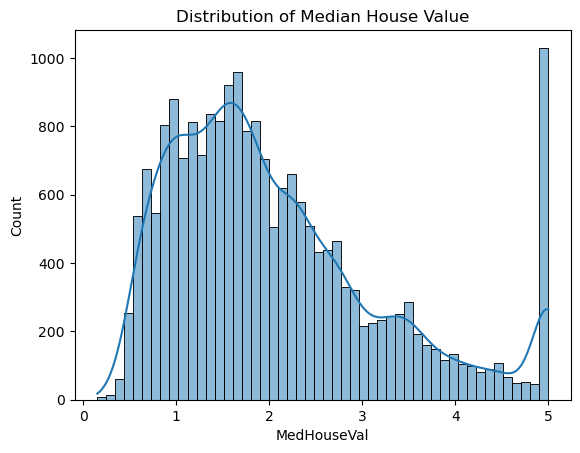

In [7]:
sns.histplot(df['MedHouseVal'], bins=50, kde=True)
plt.title('Distribution of Median House Value')

## Target Distribution Analysis
The distribution of the target variable (Median House Value) appears reasonably continuous and well-spread across most price ranges.

However, we observe a noticeable concentration of values at the upper limit (around 500,000 USD). This suggests a **ceiling effect**, meaning that house values above this threshold were capped in the dataset.

---
This cap may impact model performance, particularly for high-value districts, since the true variation above this threshold is not represented.

For this analysis, we will retain these observations but keep this limitation in mind when interpreting model results.

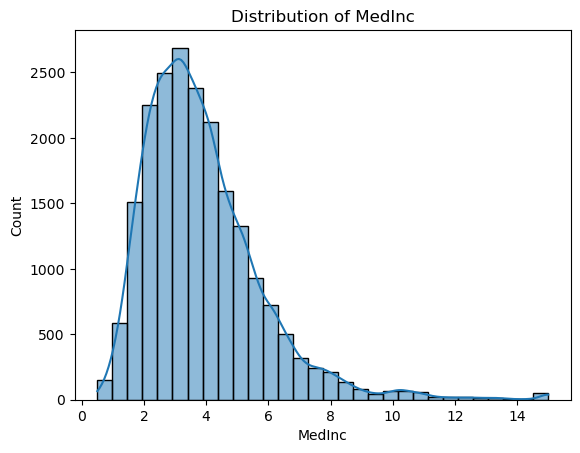

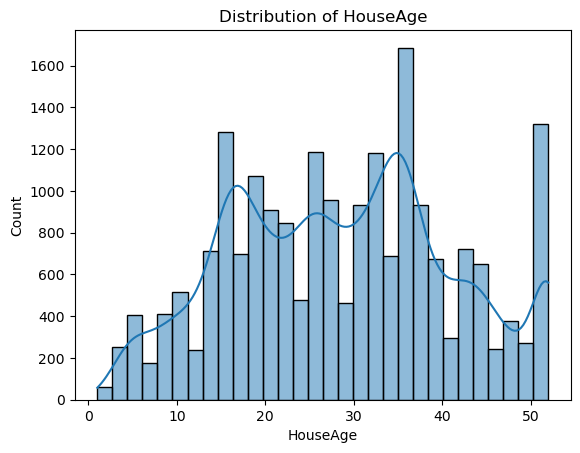

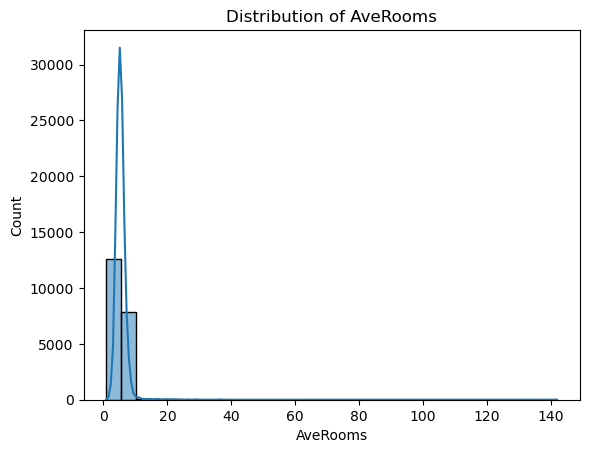

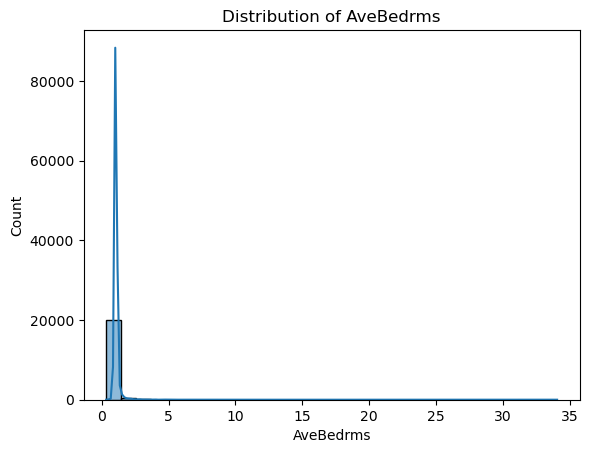

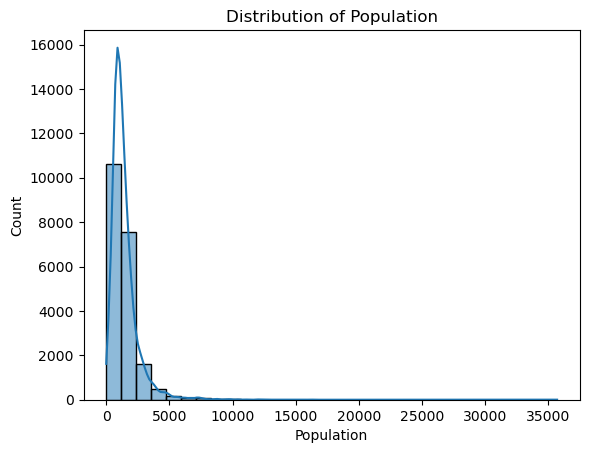

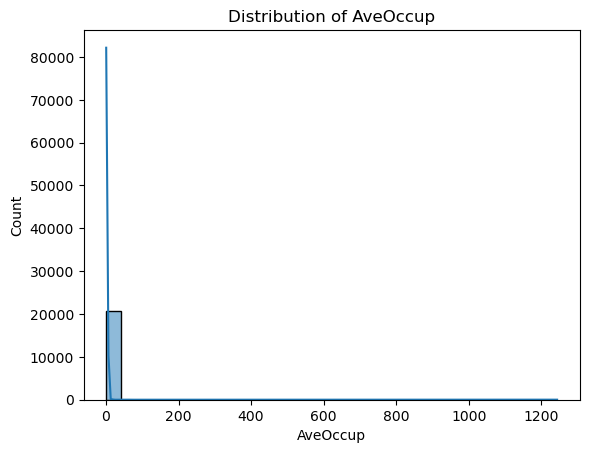

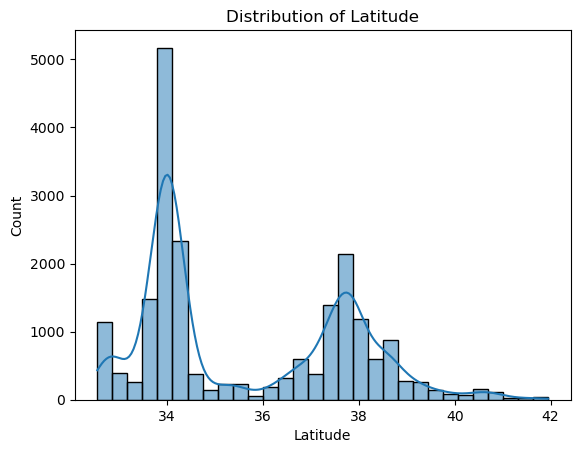

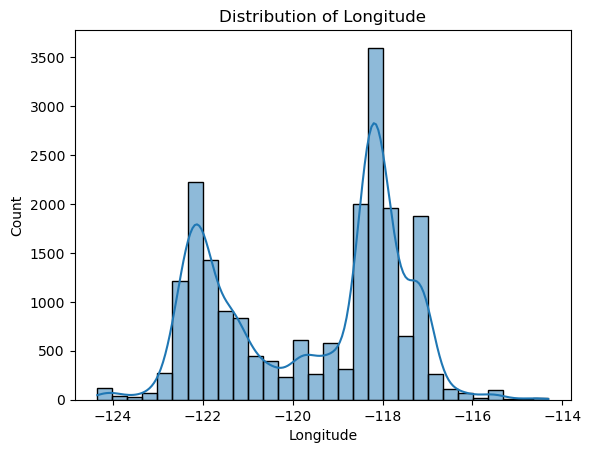

In [14]:
numeric_features = df.columns.drop('MedHouseVal')
for feature in numeric_features:
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature}')
    plt.show()

## Feature Distribution Observations
Several important patterns emerge from the individual feature distributions:
- **MedInc** shows a roughly unimodal distribution with slight right skewness, suggesting a strong and stable predictor.
- **HouseAge** appears to be capped at its maximum value (around 52), indicating another possible ceiling effect in the dataset.
- **AveRooms** and **AveBedrms** are right-skewed and represent averaged regional values rather than counts of individual houses. (numbers in these columns are both in float32 format rather than int)
- **Population** in highly right-skewed, with most districts below 10,000 residents.
- **AveOccup** contains extreme values that may influence linear models.
- Geographic features (**Latitude** and **Longitude**) are not meaningful in isolation and require spatial visualization to reveal patterns.

At this stage, no features are removed. These observations will inform later modeling decisions.

<Axes: xlabel='Longitude', ylabel='Latitude'>

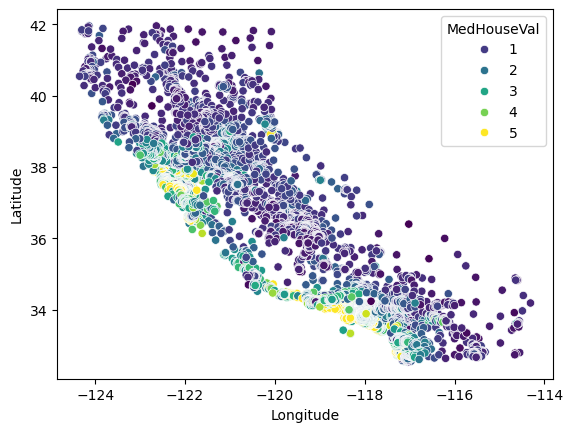

In [16]:
sns.scatterplot(data=df, x='Longitude',y='Latitude',hue='MedHouseVal',palette='viridis')

## Geographic Price Patterns

The spatial scatter plot reveals clear geographic price patterns across California. 

We observe that districts located closer to the coast tend to have higher median house values, while inland regions generally show lower prices. This suggests that proximity to the ocean is an important latent factor influencing housing prices.

---
Although Latitude and Longitude alone are not directly interpretable in isolation, their combined spatial representation highlights meaningful regional trends.

This observation indicates that geographic location plays a significant role in predicting house values and may introduce non-linear relationships that models like Random Forest can better capture.


In [20]:
df.drop('MedHouseVal',axis=1).corrwith(df['MedHouseVal']).sort_values(ascending=False)

MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
dtype: float64

## Correlation Analysis with Target

The correlation results highlight **MedInc** as the strongest linear predictor of house prices (0.69), confirming that income level is a major driver of housing value.

Features such as **AveRooms** and **HouseAge** show weaker positive relationships, suggesting limited linear influence.

Geographic variables (**Latitude**, **Longitude**) display modest correlations, yet previous spatial visualization revealed meaningful regional patterns. This indicates that geographic effects may be non-linear and not fully captured by simple correlation analysis.

Other variables, including **Population** and **AveOccup**, show minimal linear association with the target.

---
Overall, income appears to be the dominant linear factor, while geographic effects may require more flexible models to capture their influence.


## EDA Summary and Key Insights

Throughout the exploratory analysis, several important findings emerged:

- **Median Income (MedInc)** is the strongest linear predictor of house prices.
- The target variable exhibits a ceiling effect at the upper price limit.
- Geographic features reveal meaningful spatial patterns, particularly higher prices in coastal regions.
- Some variables (e.g., Population and AveOccup) show weak linear relationships but may still contribute through non-linear interactions.
- The dataset contains no missing values and requires no immediate imputation or cleaning.

Overall, the data is clean and structurally sound. While income appears to be the dominant linear driver of housing prices, geographic patterns suggest the presence of non-linear relationships.

---
In the next stage, we will proceed to data splitting and model development, comparing Linear Regression and Random Forest to evaluate both linear and non-linear predictive performance.


In [24]:
X = df.drop('MedHouseVal',axis=1)
y = df['MedHouseVal']
print(f'X shape is: {X.shape}, and y shape is: {y.shape}')

X shape is: (20640, 8), and y shape is: (20640,)


In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)
print(f'X_train and X_test shapes are: {X_train.shape},{X_test.shape}')
print(f'y_train and y_test shapes are: {y_train.shape},{y_test.shape}')

X_train and X_test shapes are: (14448, 8),(6192, 8)
y_train and y_test shapes are: (14448,),(6192,)


## Train-Test Split and Feature Scaling
The dataset is split into training and testing sets (70% training, 30% testing) to evaluate model performance on unseen data.

Although scaling features is often important for models sensitive to feature magnitude (like **Neural Networks** or **K-Nearest Neighbors**), in this case **Linear Regression** and **Random Forest** are not affected by the scale of input features. Therefore, no feature scaling is applied, keeping the original data values intact.

This approach ensures the model can learn from the raw numerical ranges without introducing unnecessary transformations.

---

## Baseline Model: Linear Regression
We start with a **Linear Regression** model as a baseline to understand how the raw data performs without engineering.

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
lr_predictions = lr.predict(X_test)
print(f'MAE is equal to: {mean_absolute_error(y_test,lr_predictions)}')
print(f'MSE is equal to: {mean_squared_error(y_test,lr_predictions)}')
print(f'R2 Score is equal to: {r2_score(y_test,lr_predictions)}')

MAE is equal to: 0.5447635351616547
MSE is equal to: 1.056003743655128
R2 Score is equal to: 0.21964545714365913


## Results on Test Set:
- **Mean Absolute Error(MAE):** 0.545
- **Mean Squared Error(MSE):** 1.056
- **R² Score:** 0.220

---
The Linear Regression baseline provides a reference point. These metrics show that while the model captures some patterns in the data, there is substantial room for improvement, potentially through non-linear models like Random Forest

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=101)
rf.fit(X_train,y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [34]:
rf_predictions = rf.predict(X_test)
print(f'MAE is equal to: {mean_absolute_error(y_test,rf_predictions)}')
print(f'MSE is equal to: {mean_squared_error(y_test,rf_predictions)}')
print(f'R2 Score is equal to: {r2_score(y_test,rf_predictions)}')

MAE is equal to: 0.3433435349321708
MSE is equal to: 0.2798780329659865
R2 Score is equal to: 0.7931786740502018


## Final Conclusion
In this project, we performed exploratory data analysis on the California Housing dataset and identified key patterns influencing house prices.

Key findings:
- Median income (MedInc) is the strongest linear predictor of house value.
- Geographic location (Latitude and Longitude) plays a significant role, particularly in coastal regions
- The target variable contains a ceiling effect at the upper price limit.

We trained two models:
- Linear Regression (baseline)
- Random Forest Regressor

The Random Forest model significantly outperformed Linear Regression, achieving an R² score of approximately 0.79 compared to 0.22 for the linear model. This suggests that non-linear relationships play a crucial role in predicting housing prices.

Overall, Random Forest proved to be a more suitable model for this dataset.